In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('/home/localssk23/final_ppai/')
from config import CONFIG

In [2]:
datasets = [
    "breastmnist",
    "retinamnist",
    "pneumoniamnist",
    # "dermamnist", # There is a data leak here so skip
    "bloodmnist",
    # "chestmnist", # skipping cos multilabel
    "organcmnist",
    "organsmnist",
    "organamnist",
    "pathmnist",
    "octmnist",
    "tissuemnist",
]

# Original Results from: https://medmnist.com/

In [3]:
import pandas as pd

# data for resnet-18 (28) results
data = {
    "Dataset": [
        "breastmnist",
        "retinamnist",
        "pneumoniamnist",
        "bloodmnist",
        "organcmnist",
        "organsmnist",
        "organamnist",
        "pathmnist",
        "octmnist",
        "tissuemnist"
    ],
    "(orig) AUC": [
        0.901,  # breastmnist
        0.717,  # retinamnist
        0.944,  # pneumoniamnist
        0.998,  # bloodmnist
        0.992,  # organcmnist
        0.972,  # organsmnist
        0.997,  # organamnist
        0.990,  # pathmnist
        0.943,  # octmnist
        0.930,  # tissuemnist
    ],
    "(orig) ACC": [
        0.863,  # breastmnist
        0.524,  # retinamnist
        0.854,  # pneumoniamnist
        0.958,  # bloodmnist
        0.900,  # organcmnist
        0.782,  # organsmnist
        0.935,  # organamnist
        0.911,  # pathmnist
        0.743,  # octmnist
        0.676,  # tissuemnist
    ]
}

# create dataframe
original_resnet_18_results = pd.DataFrame(data)

# display the dataframe
print(original_resnet_18_results)

          Dataset  (orig) AUC  (orig) ACC
0     breastmnist       0.901       0.863
1     retinamnist       0.717       0.524
2  pneumoniamnist       0.944       0.854
3      bloodmnist       0.998       0.958
4     organcmnist       0.992       0.900
5     organsmnist       0.972       0.782
6     organamnist       0.997       0.935
7       pathmnist       0.990       0.911
8        octmnist       0.943       0.743
9     tissuemnist       0.930       0.676


# Overall Performance Summary (Size 28)

normal

In [4]:
new_results = []

for dataset in datasets:
    overall_results = pd.read_csv(CONFIG['result_path'] + f'overall_results_{dataset}.csv')
    
    accuracy = overall_results['Overall Accuracy'].values[0]
    auc = overall_results['Overall AUC'].values[0]
    balanced_accuracy = overall_results['Balanced Accuracy'].values[0]
    
    new_results.append({
        'Dataset': dataset,
        '(new) ACC': accuracy,
        '(new) AUC': auc,
        '(new) Balanced ACC': balanced_accuracy
    })

new_results_df = pd.DataFrame(new_results)

# Displaying the new results
print(new_results_df)

          Dataset  (new) ACC  (new) AUC  (new) Balanced ACC
0     breastmnist   0.865385   0.882832            0.787594
1     retinamnist   0.497500   0.707133            0.327933
2  pneumoniamnist   0.879808   0.959426            0.840598
3      bloodmnist   0.940076   0.995822            0.931902
4     organcmnist   0.875852   0.987052            0.864870
5     organsmnist   0.725615   0.956476            0.686346
6     organamnist   0.868489   0.988523            0.860234
7       pathmnist   0.820056   0.973512            0.766973
8        octmnist   0.737000   0.930227            0.737000
9     tissuemnist   0.555690   0.847001            0.434062


private

In [5]:
new_results_private = []

for dataset in datasets:
    overall_results = pd.read_csv(CONFIG['result_path'] + f'overall_results_{dataset}_private.csv')
    
    accuracy = overall_results['Overall Accuracy'].values[0]
    auc = overall_results['Overall AUC'].values[0]
    balanced_accuracy = overall_results['Balanced Accuracy'].values[0]
    
    new_results_private.append({
        'Dataset': dataset,
        '(new) ACC': accuracy,
        '(new) AUC': auc,
        '(new) Balanced ACC': balanced_accuracy
    })

new_results_private_df = pd.DataFrame(new_results_private)

# Displaying the new results
print(new_results_private_df)

          Dataset  (new) ACC  (new) AUC  (new) Balanced ACC
0     breastmnist   0.730769   0.790100            0.500000
1     retinamnist   0.545000   0.746123            0.350190
2  pneumoniamnist   0.868590   0.959919            0.829060
3      bloodmnist   0.885998   0.986652            0.862632
4     organcmnist   0.828019   0.977505            0.813232
5     organsmnist   0.679733   0.945694            0.631076
6     organamnist   0.824333   0.979146            0.817142
7       pathmnist   0.811560   0.959342            0.765155
8        octmnist   0.667000   0.903738            0.667000
9     tissuemnist   0.586675   0.845590            0.447415


# Comparing new and old results

normal

In [6]:
# Merge the original and new results
combined_results = pd.merge(original_resnet_18_results, new_results_df, on='Dataset', how='outer')

# Reorder columns
column_order = ['Dataset', '(orig) ACC', '(new) ACC', '(orig) AUC', '(new) AUC', '(new) Balanced ACC']
combined_results = combined_results[column_order]

# Sort by the new accuracy in descending order
combined_results = combined_results.sort_values('(new) ACC', ascending=False)

# Format numeric columns to display 4 decimal places
numeric_columns = ['(orig) ACC', '(new) ACC', '(orig) AUC', '(new) AUC', '(new) Balanced ACC']
combined_results[numeric_columns] = combined_results[numeric_columns].applymap(lambda x: '{:.4f}'.format(x) if pd.notnull(x) else x)

# drop the new balanced accuracy column
combined_results = combined_results.drop('(new) Balanced ACC', axis=1)

# Add 2 colums to show the difference between the original and new results
combined_results['ACC Diff'] = combined_results['(new) ACC'].astype(float) - combined_results['(orig) ACC'].astype(float)
combined_results['AUC Diff'] = combined_results['(new) AUC'].astype(float) - combined_results['(orig) AUC'].astype(float)

# Display the combined table
print(combined_results.to_string(index=False))

# Optionally, save to a CSV file
combined_results.to_csv('combined_performance_summary.csv', index=False)

       Dataset (orig) ACC (new) ACC (orig) AUC (new) AUC  ACC Diff  AUC Diff
    bloodmnist     0.9580    0.9401     0.9980    0.9958   -0.0179   -0.0022
pneumoniamnist     0.8540    0.8798     0.9440    0.9594    0.0258    0.0154
   organcmnist     0.9000    0.8759     0.9920    0.9871   -0.0241   -0.0049
   organamnist     0.9350    0.8685     0.9970    0.9885   -0.0665   -0.0085
   breastmnist     0.8630    0.8654     0.9010    0.8828    0.0024   -0.0182
     pathmnist     0.9110    0.8201     0.9900    0.9735   -0.0909   -0.0165
      octmnist     0.7430    0.7370     0.9430    0.9302   -0.0060   -0.0128
   organsmnist     0.7820    0.7256     0.9720    0.9565   -0.0564   -0.0155
   tissuemnist     0.6760    0.5557     0.9300    0.8470   -0.1203   -0.0830
   retinamnist     0.5240    0.4975     0.7170    0.7071   -0.0265   -0.0099


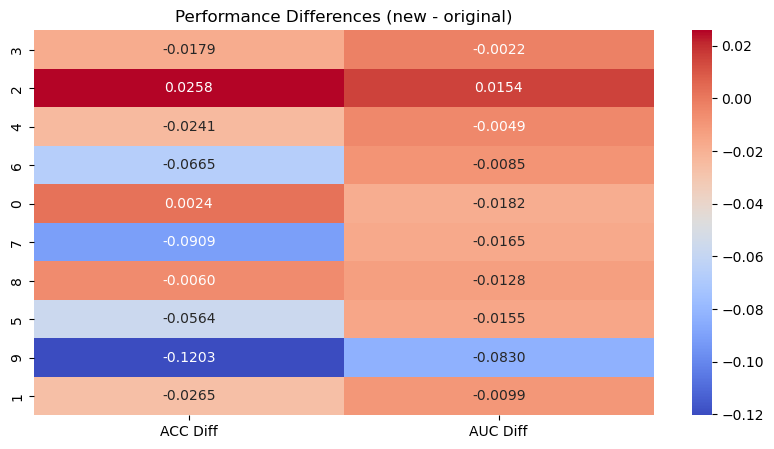

In [7]:
# Drop the dataset column
heatmap_data = combined_results.drop('Dataset', axis=1)
heatmap_data.drop('(orig) AUC', axis=1, inplace=True)
heatmap_data.drop('(new) AUC', axis=1, inplace=True)
heatmap_data.drop('(orig) ACC', axis=1, inplace=True)   
heatmap_data.drop('(new) ACC', axis=1, inplace=True)

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Performance Differences (new - original)')
plt.show()

private

In [8]:
# Merge the original and new results
combined_results = pd.merge(original_resnet_18_results, new_results_private_df, on='Dataset', how='outer')

# Reorder columns
column_order = ['Dataset', '(orig) ACC', '(new) ACC', '(orig) AUC', '(new) AUC', '(new) Balanced ACC']
combined_results = combined_results[column_order]

# Sort by the new accuracy in descending order
combined_results = combined_results.sort_values('(new) ACC', ascending=False)

# Format numeric columns to display 4 decimal places
numeric_columns = ['(orig) ACC', '(new) ACC', '(orig) AUC', '(new) AUC', '(new) Balanced ACC']
combined_results[numeric_columns] = combined_results[numeric_columns].applymap(lambda x: '{:.4f}'.format(x) if pd.notnull(x) else x)

# drop the new balanced accuracy column
combined_results = combined_results.drop('(new) Balanced ACC', axis=1)

# Add 2 colums to show the difference between the original and new results
combined_results['ACC Diff'] = combined_results['(new) ACC'].astype(float) - combined_results['(orig) ACC'].astype(float)
combined_results['AUC Diff'] = combined_results['(new) AUC'].astype(float) - combined_results['(orig) AUC'].astype(float)

# Display the combined table
print(combined_results.to_string(index=False))

# Optionally, save to a CSV file
combined_results.to_csv('combined_performance_summary.csv', index=False)

       Dataset (orig) ACC (new) ACC (orig) AUC (new) AUC  ACC Diff  AUC Diff
    bloodmnist     0.9580    0.8860     0.9980    0.9867   -0.0720   -0.0113
pneumoniamnist     0.8540    0.8686     0.9440    0.9599    0.0146    0.0159
   organcmnist     0.9000    0.8280     0.9920    0.9775   -0.0720   -0.0145
   organamnist     0.9350    0.8243     0.9970    0.9791   -0.1107   -0.0179
     pathmnist     0.9110    0.8116     0.9900    0.9593   -0.0994   -0.0307
   breastmnist     0.8630    0.7308     0.9010    0.7901   -0.1322   -0.1109
   organsmnist     0.7820    0.6797     0.9720    0.9457   -0.1023   -0.0263
      octmnist     0.7430    0.6670     0.9430    0.9037   -0.0760   -0.0393
   tissuemnist     0.6760    0.5867     0.9300    0.8456   -0.0893   -0.0844
   retinamnist     0.5240    0.5450     0.7170    0.7461    0.0210    0.0291


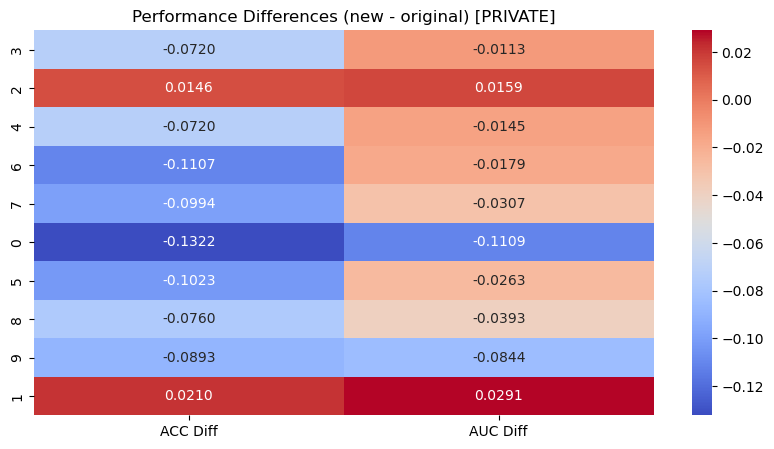

In [9]:
# Drop the dataset column
heatmap_data = combined_results.drop('Dataset', axis=1)
heatmap_data.drop('(orig) AUC', axis=1, inplace=True)
heatmap_data.drop('(new) AUC', axis=1, inplace=True)
heatmap_data.drop('(orig) ACC', axis=1, inplace=True)   
heatmap_data.drop('(new) ACC', axis=1, inplace=True)

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Performance Differences (new - original) [PRIVATE]')
plt.show()

# Comparing (new) Normal and Private Results

In [10]:
print(new_results_df.to_string(index=False))
print()

# change the column names of the private results
new_results_private_df.columns = ['Dataset', '(new) ACC [PRIVATE]', '(new) AUC [PRIVATE]', '(new) Balanced ACC [PRIVATE]']
print(new_results_private_df.to_string(index=False))

       Dataset  (new) ACC  (new) AUC  (new) Balanced ACC
   breastmnist   0.865385   0.882832            0.787594
   retinamnist   0.497500   0.707133            0.327933
pneumoniamnist   0.879808   0.959426            0.840598
    bloodmnist   0.940076   0.995822            0.931902
   organcmnist   0.875852   0.987052            0.864870
   organsmnist   0.725615   0.956476            0.686346
   organamnist   0.868489   0.988523            0.860234
     pathmnist   0.820056   0.973512            0.766973
      octmnist   0.737000   0.930227            0.737000
   tissuemnist   0.555690   0.847001            0.434062

       Dataset  (new) ACC [PRIVATE]  (new) AUC [PRIVATE]  (new) Balanced ACC [PRIVATE]
   breastmnist             0.730769             0.790100                      0.500000
   retinamnist             0.545000             0.746123                      0.350190
pneumoniamnist             0.868590             0.959919                      0.829060
    bloodmnist          

In [11]:
# Merge the original and private new results
combined_results = pd.merge(new_results_df, new_results_private_df, on='Dataset')

# Reorder columns
column_order = ['Dataset', '(new) ACC', '(new) ACC [PRIVATE]', '(new) AUC', '(new) AUC [PRIVATE]', '(new) Balanced ACC', '(new) Balanced ACC [PRIVATE]']
combined_results = combined_results[column_order]

print(combined_results.to_string(index=False))

       Dataset  (new) ACC  (new) ACC [PRIVATE]  (new) AUC  (new) AUC [PRIVATE]  (new) Balanced ACC  (new) Balanced ACC [PRIVATE]
   breastmnist   0.865385             0.730769   0.882832             0.790100            0.787594                      0.500000
   retinamnist   0.497500             0.545000   0.707133             0.746123            0.327933                      0.350190
pneumoniamnist   0.879808             0.868590   0.959426             0.959919            0.840598                      0.829060
    bloodmnist   0.940076             0.885998   0.995822             0.986652            0.931902                      0.862632
   organcmnist   0.875852             0.828019   0.987052             0.977505            0.864870                      0.813232
   organsmnist   0.725615             0.679733   0.956476             0.945694            0.686346                      0.631076
   organamnist   0.868489             0.824333   0.988523             0.979146            0.86023

<Axes: >

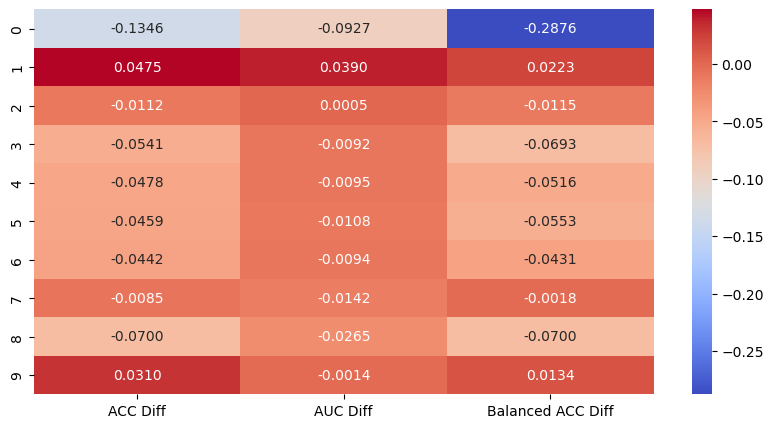

In [12]:
# create a new dataframe to store the differences
diff_results = combined_results.copy()

# drop the dataset column
diff_results.drop('Dataset', axis=1, inplace=True)

# Add 4 colums to show the difference between the new results and the private new results
diff_results['ACC Diff'] = diff_results['(new) ACC [PRIVATE]'].astype(float) - diff_results['(new) ACC'].astype(float)
diff_results['AUC Diff'] = diff_results['(new) AUC [PRIVATE]'].astype(float) - diff_results['(new) AUC'].astype(float)
diff_results['Balanced ACC Diff'] = diff_results['(new) Balanced ACC [PRIVATE]'].astype(float) - diff_results['(new) Balanced ACC'].astype(float)

# drop the original columns
diff_results.drop('(new) ACC', axis=1, inplace=True)
diff_results.drop('(new) AUC', axis=1, inplace=True)
diff_results.drop('(new) Balanced ACC', axis=1, inplace=True)
diff_results.drop('(new) ACC [PRIVATE]', axis=1, inplace=True)
diff_results.drop('(new) AUC [PRIVATE]', axis=1, inplace=True)
diff_results.drop('(new) Balanced ACC [PRIVATE]', axis=1, inplace=True)

# Display the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(diff_results, annot=True, cmap='coolwarm', fmt=".4f")

# Visualation of all combined

In [13]:
print(original_resnet_18_results.to_string(index=False))
print()
print(new_results_df.to_string(index=False))
print()
print(new_results_private_df.to_string(index=False))
print()

       Dataset  (orig) AUC  (orig) ACC
   breastmnist       0.901       0.863
   retinamnist       0.717       0.524
pneumoniamnist       0.944       0.854
    bloodmnist       0.998       0.958
   organcmnist       0.992       0.900
   organsmnist       0.972       0.782
   organamnist       0.997       0.935
     pathmnist       0.990       0.911
      octmnist       0.943       0.743
   tissuemnist       0.930       0.676

       Dataset  (new) ACC  (new) AUC  (new) Balanced ACC
   breastmnist   0.865385   0.882832            0.787594
   retinamnist   0.497500   0.707133            0.327933
pneumoniamnist   0.879808   0.959426            0.840598
    bloodmnist   0.940076   0.995822            0.931902
   organcmnist   0.875852   0.987052            0.864870
   organsmnist   0.725615   0.956476            0.686346
   organamnist   0.868489   0.988523            0.860234
     pathmnist   0.820056   0.973512            0.766973
      octmnist   0.737000   0.930227            0.737000


In [14]:
combined_results = pd.merge(original_resnet_18_results, new_results_df, on='Dataset', how='outer')
combined_results = pd.merge(combined_results, new_results_private_df, on='Dataset', how='outer')

# drop the new balanced accuracy column
combined_results = combined_results.drop('(new) Balanced ACC', axis=1)
combined_results = combined_results.drop('(new) Balanced ACC [PRIVATE]', axis=1)

# Reorder columns
column_order = ['Dataset', '(orig) ACC', '(new) ACC', '(new) ACC [PRIVATE]', '(orig) AUC', '(new) AUC', '(new) AUC [PRIVATE]']
combined_results = combined_results[column_order]

print(combined_results.to_string(index=False))

       Dataset  (orig) ACC  (new) ACC  (new) ACC [PRIVATE]  (orig) AUC  (new) AUC  (new) AUC [PRIVATE]
   breastmnist       0.863   0.865385             0.730769       0.901   0.882832             0.790100
   retinamnist       0.524   0.497500             0.545000       0.717   0.707133             0.746123
pneumoniamnist       0.854   0.879808             0.868590       0.944   0.959426             0.959919
    bloodmnist       0.958   0.940076             0.885998       0.998   0.995822             0.986652
   organcmnist       0.900   0.875852             0.828019       0.992   0.987052             0.977505
   organsmnist       0.782   0.725615             0.679733       0.972   0.956476             0.945694
   organamnist       0.935   0.868489             0.824333       0.997   0.988523             0.979146
     pathmnist       0.911   0.820056             0.811560       0.990   0.973512             0.959342
      octmnist       0.743   0.737000             0.667000       0.943   